# Calculating ticket quality
based on article tic_QA.pdf

There are four main categories:
- Character-level features: A low-quality ticket resolution might include a large number of unexpected characters, such as space, wrong or excessive capitalization, and special characters.
- Entity-level features: A high-quality ticket resolution is expected to provide information on IT-related entities, such as server name, file path, IP address, and so forth. Because the ticket resolutions are expected to guide system administrators to solve the problem specified in the ticket summary, the presence of the context- relevant entities makes the resolution text more useful.
- Semantic-level features: A high-quality ticket resolution typically includes Verb and Noun, which explicitly guides system administrators on the actions taken to diagnose the problem and to resolve the ticket.
- Attribute-level features: A high-quality ticket resolution usually is lengthy enough to carry sufficient information relevant to the problem described in the ticket summary.

The ticket resolution quality quantifier uses these 4 groups of features and operates on the historical tickets to output a set of triplets{<s1,r1,q1 >,<s2,r2,q2 >,...,<sn,rn,qn >}wheresi and ri are ticket summary and ticket resolution for the ith ticket, and qi is the quality score assigned by the quantifier.

## Imports

In [6]:
import pandas as pd
import numpy as np

## Loading data

functions to get the amount of characters of certain fields

In [144]:
def remove_nan(dataframe: pd.DataFrame, column: str, char=''):
    dataframe[column] = dataframe[column].replace(np.nan, char, regex=True)
    return dataframe

def add_column_length(dataframe: pd.DataFrame, target_column: str, new_column_name: str=None, new_column_position: int=None, char='') -> pd.DataFrame:
    if new_column_name is None:
        new_column_name = target_column + ' length'
    if new_column_position is None:
        cols = dataframe.columns.tolist()
        id = cols.index(target_column)
        new_column_position = id + 1
    
    dataframe = remove_nan(dataframe, column=target_column, char=char)
    dataframe[new_column_name] = dataframe.apply(lambda x: len(x[target_column]), axis=1)
    if new_column_position != -1:
        cols = dataframe.columns.tolist()
        cols.insert(new_column_position, cols[-1])
        cols.pop(-1)
        dataframe = dataframe[cols]
    return dataframe


In [145]:
incidents = pd.read_csv('../data/Preprocessed_Data.csv', index_col=0)
incidents = add_column_length(incidents, 'Description', 'Description_length', char='')
incidents = add_column_length(incidents, 'Resolution_notes', 'Resolution_length', char='')
incidents = add_column_length(incidents, 'Short_description', 'Short_description_length', char='')
incidents

,Number,Priority,Incident_area,Opened,Closed,Status,Problem,Configuration_item,Short_description,Short_description_length,Description,Description_length,Assignment_group,Resolution_notes,Resolution_length,Reassignment_count,Resolve_time
0,INC0284448,P2 - High,SAP :: Sonda Procwork (PRW),44013.002951,44024.875023,Closed,NaN,NaN,VF - Not working,16,"Please, the transaction VF is not working, we ...",104,IMT APS SAP Order to Cash L2,"Hello Daniel,Many thanks for your reply, at ti...",247,1.0,158300.0
1,INC0284449,P4 - Low,SAP :: Technical,44013.003183,44023.083368,Closed,NaN,SAP-ECC-PRD,Enqueue Processing,19,Alert Details: Name....................Enqueue...,479,IMT TCS SAP Basis,Monitoring the lock entries in P via incident ...,105,0.0,5694.0
2,INC0180368,P2 - High,Infrastructure & Servers :: Server (physical/v...,43831.011447,43842.500012,Closed,NaN,GOYCSM0001DC,GOYCSMDC.ds.givaudan.com (Server does not comm...,151,"Dear Team,We received a ticket from our monito...",2090,IMT NLI Ops EAME,There was a planned maintenance onsite that wa...,105,1.0,126566.0
3,INC0180373,P3 - Moderate,SAP :: Order to Cash (OTC),43831.132951,43871.625023,Closed,NaN,NaN,I cant connect to ESKER PRD & UAT,33,"I already got access for ESKER QA, UAT & PRD. ...",569,IMT Desktop Infra Support Indonesia,User confirmed issue was solved,31,3.0,1919058.0
4,INC0180380,P3 - Moderate,Business Application :: Google,43831.405255,43841.416678,Closed,NaN,NaN,I cannot access my google drive shortcut from ...,56,I cannot access my google drive shortcut from ...,103,IMT Service Desk AME,"User G drive was inactive, i reconfigured it, ...",90,0.0,128.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117240,INC0438584,P4 - Low,User Workplace :: Desk Phone,44307.926146,44317.958345,Closed,NaN,NaN,Telephone connectivity,22,Could you help me reviewing telephone connecti...,108,IMT Service Desk Colombia,,0,0.0,381.0
117241,INC0438587,P3 - Moderate,User Workplace :: Printer,44307.933252,44317.958345,Closed,NaN,NaN,actualizacion de drivers,24,">> Full details from ""Requested by"" :impresora...",246,IMT Service Desk Mexico,se actualizaron los drivers de impresoras soli...,55,0.0,53.0
117242,INC0440299,P4 - Low,"Internet, network & remote access :: LAN infra...",44312.497905,44312.521979,Closed,NaN,GKYNYF0001,,0,,0,IMT NLI Ops Orange,,0,1.0,2080.0
117243,INC0440766,P4 - Low,"Internet, network & remote access :: OBS",44312.896644,44316.664167,Closed,NaN,GHSNYF0002,Secondary firewall blocking all traffic; zone ...,63,"Investigating some issues at the site, William...",393,IMT NLI Ops AMER,,0,7.0,325514.0


In [148]:
incidents.to_csv('../data/Preprocessed_Data_Length.csv')

In [43]:
from typing import Callable

def add_ratio(dataframe: pd.DataFrame, column: str, func: Callable, new_column: str) -> pd.DataFrame:
    dataframe[new_column] = dataframe[column].apply(func)
    return dataframe

## Character-level features

In [ ]:
from typing import Callable

def add_ratio(dataframe: pd.DataFrame, column: str, func: Callable, new_column: str) -> pd.DataFrame:
    dataframe[new_column] = dataframe[column].apply(func)
    return dataframe

In [45]:
def char_ratio(text: str, char: str) -> float:
    count = text.count(char)
    try:
        result = count / len(text)
    except ZeroDivisionError:
        result = np.NaN
    return result

ExclamationRatio

In [33]:
def exclam_ratio(text: str) -> float:
    return char_ratio(text, '!')


colonRatio

In [34]:
def colon_ratio(text: str) -> float:
    return char_ratio(text, ':')


BraketRatio

In [35]:
def bracket_ratio(text: str) -> float:
    left = char_ratio(text, '(')
    right = char_ratio(text, ')')
    return left + right

@Ratio

In [36]:
def at_ratio(text: str) -> float:
    return char_ratio(text, '@')

digitRatio

In [50]:
def digit_ratio(text: str) -> float:
    digits = sum(c.isdigit() for c in text)
    try:
        result = digits / len(text)
    except ZeroDivisionError:
        result = np.NaN
    return result

uppercaseRatio

In [38]:
def uppercase_ratio(text: str) -> float:
    upper = sum(c.isupper() for c in text)
    try:
        result = upper / len(text)
    except ZeroDivisionError:
        result = np.NaN
    return result

lowercaseRatio

In [51]:
def lowercase_ratio(text: str) -> float:
    lower = sum(c.islower() for c in text)
    try:
        result = lower / len(text)
    except ZeroDivisionError:
        result = np.NaN
    return result

punctuationRatio

In [40]:
def punctuation_ratio(text: str) -> float:
    return char_ratio(text, '.')

whitespaceRatio

In [41]:
def whitespace_ratio(text: str) -> float:
    return char_ratio(text, ' ')

### Test

In [52]:
# test of adding exclamation ratio
add_ratio(incidents, 'Description', exclam_ratio, 'Description_exclam_ratio')

,Number,Priority,Incident_area,Opened,Closed,Status,Problem,Configuration_item,Short_description,Short_description_length,Description,Description_length,Assignment_group,Resolution_notes,Resolution_length,Reassignment_count,Resolve_time,Description_exclam_ratio
0,INC0284448,P2 - High,SAP :: Sonda Procwork (PRW),44013.002951,44024.875023,Closed,NaN,NaN,VF - Not working,16,"Please, the transaction VF is not working, we ...",104,IMT APS SAP Order to Cash L2,"Hello Daniel,Many thanks for your reply, at ti...",247,1.0,158300.0,0.000000
1,INC0284449,P4 - Low,SAP :: Technical,44013.003183,44023.083368,Closed,NaN,SAP-ECC-PRD,Enqueue Processing,19,Alert Details: Name....................Enqueue...,479,IMT TCS SAP Basis,Monitoring the lock entries in P via incident ...,105,0.0,5694.0,0.000000
2,INC0180368,P2 - High,Infrastructure & Servers :: Server (physical/v...,43831.011447,43842.500012,Closed,NaN,GOYCSM0001DC,GOYCSMDC.ds.givaudan.com (Server does not comm...,151,"Dear Team,We received a ticket from our monito...",2090,IMT NLI Ops EAME,There was a planned maintenance onsite that wa...,105,1.0,126566.0,0.000478
3,INC0180373,P3 - Moderate,SAP :: Order to Cash (OTC),43831.132951,43871.625023,Closed,NaN,NaN,I cant connect to ESKER PRD & UAT,33,"I already got access for ESKER QA, UAT & PRD. ...",569,IMT Desktop Infra Support Indonesia,User confirmed issue was solved,31,3.0,1919058.0,0.000000
4,INC0180380,P3 - Moderate,Business Application :: Google,43831.405255,43841.416678,Closed,NaN,NaN,I cannot access my google drive shortcut from ...,56,I cannot access my google drive shortcut from ...,103,IMT Service Desk AME,"User G drive was inactive, i reconfigured it, ...",90,0.0,128.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117240,INC0438584,P4 - Low,User Workplace :: Desk Phone,44307.926146,44317.958345,Closed,NaN,NaN,Telephone connectivity,22,Could you help me reviewing telephone connecti...,108,IMT Service Desk Colombia,,0,0.0,381.0,0.009259
117241,INC0438587,P3 - Moderate,User Workplace :: Printer,44307.933252,44317.958345,Closed,NaN,NaN,actualizacion de drivers,24,">> Full details from ""Requested by"" :impresora...",246,IMT Service Desk Mexico,se actualizaron los drivers de impresoras soli...,55,0.0,53.0,0.000000
117242,INC0440299,P4 - Low,"Internet, network & remote access :: LAN infra...",44312.497905,44312.521979,Closed,NaN,GKYNYF0001,,0,,0,IMT NLI Ops Orange,,0,1.0,2080.0,NaN
117243,INC0440766,P4 - Low,"Internet, network & remote access :: OBS",44312.896644,44316.664167,Closed,NaN,GHSNYF0002,Secondary firewall blocking all traffic; zone ...,63,"Investigating some issues at the site, William...",393,IMT NLI Ops AMER,,0,7.0,325514.0,0.000000


In [53]:
incidents.sort_values(by='Description_exclam_ratio', ascending=False).head()

,Number,Priority,Incident_area,Opened,Closed,Status,Problem,Configuration_item,Short_description,Short_description_length,Description,Description_length,Assignment_group,Resolution_notes,Resolution_length,Reassignment_count,Resolve_time,Description_exclam_ratio
83993,INC0369245,P4 - Low,Productivity Software :: Google Apps,44179.542998,44198.583356,Closed,PRB0046933,NaN,"no access to my Google account, unable to acce...",107,my Google account not found!!!!!!!!!!!!!!!!!!!...,119,IMT Service Desk Sao Paulo,In contact with user she informed that the iss...,60,0.0,9539.0,0.378151
64394,INC0330690,P4 - Low,Rights & access management :: Access Denied,44099.129028,44120.166690,Closed,NaN,NaN,User relocated to Singapore but account is sti...,58,">> Full details from ""Requested by"" :Please mo...",396,IMT Desktop Infra Support Singapore,TCS migrated user from TO to SR.,32,3.0,952280.0,0.282828
98133,INC0394938,P2 - High,Rights & access management :: Access Denied,44235.689988,44245.750046,Closed,NaN,NaN,locked myself out of SAP due to two may tries ...,96,">> Full details from ""Requested by"" :locked my...",314,IMT Service Desk LATAM L1,The PW was reset by the time we got to the tic...,70,1.0,4227.0,0.146497
98131,INC0394934,P3 - Moderate,SAP :: Manufacturing (MFG),44235.687396,44245.708380,Closed,NaN,NaN,I am locked out of SAP due to to many try's,43,Please on lock SAP account access for myself. ...,153,IMT APS SAP Roles and Authorizations L2,,0,1.0,504.0,0.098039
75872,INC0354057,P2 - High,Rights & access management :: Access Denied,44147.362650,44158.375104,Closed,NaN,NaN,locked account Irina Zorina\Zazybina,36,">> Full details from ""Requested by"" :Hello! On...",348,IMT Service Desk Zuerich,after a long story we getting these things adj...,52,0.0,86267.0,0.091954


## Entity level features

## Semantic level features

In [71]:
nltk.download()


showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [149]:
import nltk
# from nltk import word_tokenize
# nltk.download()
text = word_tokenize("This is a sentence.")

In [150]:
sentence_tagged = nltk.pos_tag(text, tagset='universal')
sentence_tagged

[('This', 'DET'),
 ('is', 'VERB'),
 ('a', 'DET'),
 ('sentence', 'NOUN'),
 ('.', '.')]

In [151]:
tag_fd = nltk.FreqDist(tag for (word, tag) in sentence_tagged)
tag_fd

FreqDist({'DET': 2, 'VERB': 1, 'NOUN': 1, '.': 1})

In [75]:
from nltk.corpus import brown
brown_news_tagged = brown.tagged_words(categories='news', tagset='universal')
print(brown_news_tagged[:10])
tag_fd = nltk.FreqDist(tag for (word, tag) in brown_news_tagged)
tag_fd.most_common()

[('The', 'DET'), ('Fulton', 'NOUN'), ('County', 'NOUN'), ('Grand', 'ADJ'), ('Jury', 'NOUN'), ('said', 'VERB'), ('Friday', 'NOUN'), ('an', 'DET'), ('investigation', 'NOUN'), ('of', 'ADP')]


[('NOUN', 30654),
 ('VERB', 14399),
 ('ADP', 12355),
 ('.', 11928),
 ('DET', 11389),
 ('ADJ', 6706),
 ('ADV', 3349),
 ('CONJ', 2717),
 ('PRON', 2535),
 ('PRT', 2264),
 ('NUM', 2166),
 ('X', 92)]

In [152]:
def get_all_tags(dataframe: pd.DataFrame, column: str) -> nltk.probability.FreqDist:
    sentences = dataframe[column].values
    tokens = [word_tokenize(sentence) for sentence in sentences]
    tags = [nltk.pos_tag(token, tagset='universal') for token in tokens]
    


In [153]:
def get_tags(text: str) -> nltk.FreqDist:
    tokens = word_tokenize(text)
    sentence_tagged = nltk.pos_tag(tokens, tagset='universal')
    tag_fd = nltk.FreqDist(tag for (word, tag) in sentence_tagged)
    return dict(tag_fd)


def get_tags_column(dataframe: pd.DataFrame, column: str, func: Callable, new_column: str=None, new_column_index: int=None) -> pd.DataFrame:
    if new_column is None:
        new_column = column + "_tags"

    if new_column_index is None:
        new_column_index = dataframe.columns.to_list().index(column) + 1
    

    dataframe[new_column] = dataframe[column].apply(func)
    if new_column_index != -1:
        cols = dataframe.columns.to_list()
        cols.insert(new_column_index, cols[-1])
        cols.pop(-1)
        dataframe = dataframe[cols]

    return dataframe

In [183]:
import json
def get_all_tags(dataframe: pd.DataFrame, column: str) -> dict:
    all_tags = {}
    for d in dataframe[column]:
        if type(d) == str:
            d = json.loads(d.replace("'", '"'))
        for key, value in d.items():
            if key in all_tags:
                all_tags[key] += value
            else:
                all_tags[key] = value   
    return all_tags

In [155]:
incidents = get_tags_column(incidents, 'Description', get_tags)
incidents

,Number,Priority,Incident_area,Opened,Closed,Status,Problem,Configuration_item,Short_description,Short_description_length,Description,Description_tags,Description_length,Assignment_group,Resolution_notes,Resolution_length,Reassignment_count,Resolve_time
0,INC0284448,P2 - High,SAP :: Sonda Procwork (PRW),44013.002951,44024.875023,Closed,NaN,NaN,VF - Not working,16,"Please, the transaction VF is not working, we ...","{'NOUN': 10, '.': 3, 'DET': 1, 'VERB': 4, 'ADV...",104,IMT APS SAP Order to Cash L2,"Hello Daniel,Many thanks for your reply, at ti...",247,1.0,158300.0
1,INC0284449,P4 - Low,SAP :: Technical,44013.003183,44023.083368,Closed,NaN,SAP-ECC-PRD,Enqueue Processing,19,Alert Details: Name....................Enqueue...,"{'NOUN': 46, '.': 5, 'ADJ': 1, 'VERB': 1, 'PRT...",479,IMT TCS SAP Basis,Monitoring the lock entries in P via incident ...,105,0.0,5694.0
2,INC0180368,P2 - High,Infrastructure & Servers :: Server (physical/v...,43831.011447,43842.500012,Closed,NaN,GOYCSM0001DC,GOYCSMDC.ds.givaudan.com (Server does not comm...,151,"Dear Team,We received a ticket from our monito...","{'NOUN': 129, '.': 88, 'PRON': 4, 'VERB': 28, ...",2090,IMT NLI Ops EAME,There was a planned maintenance onsite that wa...,105,1.0,126566.0
3,INC0180373,P3 - Moderate,SAP :: Order to Cash (OTC),43831.132951,43871.625023,Closed,NaN,NaN,I cant connect to ESKER PRD & UAT,33,"I already got access for ESKER QA, UAT & PRD. ...","{'PRON': 5, 'ADV': 2, 'VERB': 11, 'NOUN': 33, ...",569,IMT Desktop Infra Support Indonesia,User confirmed issue was solved,31,3.0,1919058.0
4,INC0180380,P3 - Moderate,Business Application :: Google,43831.405255,43841.416678,Closed,NaN,NaN,I cannot access my google drive shortcut from ...,56,I cannot access my google drive shortcut from ...,"{'PRON': 3, 'VERB': 1, 'ADV': 1, 'NOUN': 9, 'A...",103,IMT Service Desk AME,"User G drive was inactive, i reconfigured it, ...",90,0.0,128.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117240,INC0438584,P4 - Low,User Workplace :: Desk Phone,44307.926146,44317.958345,Closed,NaN,NaN,Telephone connectivity,22,Could you help me reviewing telephone connecti...,"{'NOUN': 11, 'PRON': 2, 'VERB': 2, '.': 3, 'AD...",108,IMT Service Desk Colombia,,0,0.0,381.0
117241,INC0438587,P3 - Moderate,User Workplace :: Printer,44307.933252,44317.958345,Closed,NaN,NaN,actualizacion de drivers,24,">> Full details from ""Requested by"" :impresora...","{'NOUN': 15, 'CONJ': 1, 'ADP': 6, '.': 13, 'VE...",246,IMT Service Desk Mexico,se actualizaron los drivers de impresoras soli...,55,0.0,53.0
117242,INC0440299,P4 - Low,"Internet, network & remote access :: LAN infra...",44312.497905,44312.521979,Closed,NaN,GKYNYF0001,,0,,{},0,IMT NLI Ops Orange,,0,1.0,2080.0
117243,INC0440766,P4 - Low,"Internet, network & remote access :: OBS",44312.896644,44316.664167,Closed,NaN,GHSNYF0002,Secondary firewall blocking all traffic; zone ...,63,"Investigating some issues at the site, William...","{'VERB': 16, 'DET': 9, 'NOUN': 17, 'ADP': 6, '...",393,IMT NLI Ops AMER,,0,7.0,325514.0


In [110]:
# incidents.to_csv('../data/incidents_tags.csv')

In [156]:
incidents = get_tags_column(incidents, 'Resolution_notes', new_column='Resolution_tags', get_tags)
incidents

<ipython-input-153-f2a5c0c4d7fd>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[new_column] = dataframe[column].apply(func)


,Number,Priority,Incident_area,Opened,Closed,Status,Problem,Configuration_item,Short_description,Short_description_length,Description,Description_tags,Description_length,Assignment_group,Resolution_notes,Resolution_notes_tags,Resolution_length,Reassignment_count,Resolve_time
0,INC0284448,P2 - High,SAP :: Sonda Procwork (PRW),44013.002951,44024.875023,Closed,NaN,NaN,VF - Not working,16,"Please, the transaction VF is not working, we ...","{'NOUN': 10, '.': 3, 'DET': 1, 'VERB': 4, 'ADV...",104,IMT APS SAP Order to Cash L2,"Hello Daniel,Many thanks for your reply, at ti...","{'NOUN': 13, '.': 6, 'ADJ': 2, 'ADP': 5, 'PRON...",247,1.0,158300.0
1,INC0284449,P4 - Low,SAP :: Technical,44013.003183,44023.083368,Closed,NaN,SAP-ECC-PRD,Enqueue Processing,19,Alert Details: Name....................Enqueue...,"{'NOUN': 46, '.': 5, 'ADJ': 1, 'VERB': 1, 'PRT...",479,IMT TCS SAP Basis,Monitoring the lock entries in P via incident ...,"{'VERB': 2, 'DET': 3, 'NOUN': 8, 'ADP': 3, 'AD...",105,0.0,5694.0
2,INC0180368,P2 - High,Infrastructure & Servers :: Server (physical/v...,43831.011447,43842.500012,Closed,NaN,GOYCSM0001DC,GOYCSMDC.ds.givaudan.com (Server does not comm...,151,"Dear Team,We received a ticket from our monito...","{'NOUN': 129, '.': 88, 'PRON': 4, 'VERB': 28, ...",2090,IMT NLI Ops EAME,There was a planned maintenance onsite that wa...,"{'DET': 3, 'VERB': 4, 'ADJ': 2, 'NOUN': 4, 'PR...",105,1.0,126566.0
3,INC0180373,P3 - Moderate,SAP :: Order to Cash (OTC),43831.132951,43871.625023,Closed,NaN,NaN,I cant connect to ESKER PRD & UAT,33,"I already got access for ESKER QA, UAT & PRD. ...","{'PRON': 5, 'ADV': 2, 'VERB': 11, 'NOUN': 33, ...",569,IMT Desktop Infra Support Indonesia,User confirmed issue was solved,"{'NOUN': 2, 'VERB': 3}",31,3.0,1919058.0
4,INC0180380,P3 - Moderate,Business Application :: Google,43831.405255,43841.416678,Closed,NaN,NaN,I cannot access my google drive shortcut from ...,56,I cannot access my google drive shortcut from ...,"{'PRON': 3, 'VERB': 1, 'ADV': 1, 'NOUN': 9, 'A...",103,IMT Service Desk AME,"User G drive was inactive, i reconfigured it, ...","{'NOUN': 5, 'VERB': 3, 'ADJ': 1, '.': 2, 'ADV'...",90,0.0,128.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117240,INC0438584,P4 - Low,User Workplace :: Desk Phone,44307.926146,44317.958345,Closed,NaN,NaN,Telephone connectivity,22,Could you help me reviewing telephone connecti...,"{'NOUN': 11, 'PRON': 2, 'VERB': 2, '.': 3, 'AD...",108,IMT Service Desk Colombia,,{},0,0.0,381.0
117241,INC0438587,P3 - Moderate,User Workplace :: Printer,44307.933252,44317.958345,Closed,NaN,NaN,actualizacion de drivers,24,">> Full details from ""Requested by"" :impresora...","{'NOUN': 15, 'CONJ': 1, 'ADP': 6, '.': 13, 'VE...",246,IMT Service Desk Mexico,se actualizaron los drivers de impresoras soli...,"{'NOUN': 5, 'VERB': 1, 'X': 1, '.': 1}",55,0.0,53.0
117242,INC0440299,P4 - Low,"Internet, network & remote access :: LAN infra...",44312.497905,44312.521979,Closed,NaN,GKYNYF0001,,0,,{},0,IMT NLI Ops Orange,,{},0,1.0,2080.0
117243,INC0440766,P4 - Low,"Internet, network & remote access :: OBS",44312.896644,44316.664167,Closed,NaN,GHSNYF0002,Secondary firewall blocking all traffic; zone ...,63,"Investigating some issues at the site, William...","{'VERB': 16, 'DET': 9, 'NOUN': 17, 'ADP': 6, '...",393,IMT NLI Ops AMER,,{},0,7.0,325514.0


In [157]:
incidents.to_csv('../data/Preprocessed_Data_Tags.csv')

In [161]:
incidents_2 = pd.read_csv('../data/Preprocessed_Data_Tags.csv', index_col=0)

In [194]:
incidents_2

,Number,Priority,Incident_area,Opened,Closed,Status,Problem,Configuration_item,Short_description,Short_description_length,Description,Description_tags,Description_length,Assignment_group,Resolution_notes,Resolution_notes_tags,Resolution_length,Reassignment_count,Resolve_time
0,INC0284448,P2 - High,SAP :: Sonda Procwork (PRW),44013.002951,44024.875023,Closed,NaN,NaN,VF - Not working,16,"Please, the transaction VF is not working, we ...","{'NOUN': 10, '.': 3, 'DET': 1, 'VERB': 4, 'ADV...",104,IMT APS SAP Order to Cash L2,"Hello Daniel,Many thanks for your reply, at ti...","{'NOUN': 13, '.': 6, 'ADJ': 2, 'ADP': 5, 'PRON...",247,1.0,158300.0
1,INC0284449,P4 - Low,SAP :: Technical,44013.003183,44023.083368,Closed,NaN,SAP-ECC-PRD,Enqueue Processing,19,Alert Details: Name....................Enqueue...,"{'NOUN': 46, '.': 5, 'ADJ': 1, 'VERB': 1, 'PRT...",479,IMT TCS SAP Basis,Monitoring the lock entries in P via incident ...,"{'VERB': 2, 'DET': 3, 'NOUN': 8, 'ADP': 3, 'AD...",105,0.0,5694.0
2,INC0180368,P2 - High,Infrastructure & Servers :: Server (physical/v...,43831.011447,43842.500012,Closed,NaN,GOYCSM0001DC,GOYCSMDC.ds.givaudan.com (Server does not comm...,151,"Dear Team,We received a ticket from our monito...","{'NOUN': 129, '.': 88, 'PRON': 4, 'VERB': 28, ...",2090,IMT NLI Ops EAME,There was a planned maintenance onsite that wa...,"{'DET': 3, 'VERB': 4, 'ADJ': 2, 'NOUN': 4, 'PR...",105,1.0,126566.0
3,INC0180373,P3 - Moderate,SAP :: Order to Cash (OTC),43831.132951,43871.625023,Closed,NaN,NaN,I cant connect to ESKER PRD & UAT,33,"I already got access for ESKER QA, UAT & PRD. ...","{'PRON': 5, 'ADV': 2, 'VERB': 11, 'NOUN': 33, ...",569,IMT Desktop Infra Support Indonesia,User confirmed issue was solved,"{'NOUN': 2, 'VERB': 3}",31,3.0,1919058.0
4,INC0180380,P3 - Moderate,Business Application :: Google,43831.405255,43841.416678,Closed,NaN,NaN,I cannot access my google drive shortcut from ...,56,I cannot access my google drive shortcut from ...,"{'PRON': 3, 'VERB': 1, 'ADV': 1, 'NOUN': 9, 'A...",103,IMT Service Desk AME,"User G drive was inactive, i reconfigured it, ...","{'NOUN': 5, 'VERB': 3, 'ADJ': 1, '.': 2, 'ADV'...",90,0.0,128.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117240,INC0438584,P4 - Low,User Workplace :: Desk Phone,44307.926146,44317.958345,Closed,NaN,NaN,Telephone connectivity,22,Could you help me reviewing telephone connecti...,"{'NOUN': 11, 'PRON': 2, 'VERB': 2, '.': 3, 'AD...",108,IMT Service Desk Colombia,NaN,{},0,0.0,381.0
117241,INC0438587,P3 - Moderate,User Workplace :: Printer,44307.933252,44317.958345,Closed,NaN,NaN,actualizacion de drivers,24,">> Full details from ""Requested by"" :impresora...","{'NOUN': 15, 'CONJ': 1, 'ADP': 6, '.': 13, 'VE...",246,IMT Service Desk Mexico,se actualizaron los drivers de impresoras soli...,"{'NOUN': 5, 'VERB': 1, 'X': 1, '.': 1}",55,0.0,53.0
117242,INC0440299,P4 - Low,"Internet, network & remote access :: LAN infra...",44312.497905,44312.521979,Closed,NaN,GKYNYF0001,NaN,0,NaN,{},0,IMT NLI Ops Orange,NaN,{},0,1.0,2080.0
117243,INC0440766,P4 - Low,"Internet, network & remote access :: OBS",44312.896644,44316.664167,Closed,NaN,GHSNYF0002,Secondary firewall blocking all traffic; zone ...,63,"Investigating some issues at the site, William...","{'VERB': 16, 'DET': 9, 'NOUN': 17, 'ADP': 6, '...",393,IMT NLI Ops AMER,NaN,{},0,7.0,325514.0


In [195]:
from typing import List
def convert_to_dict(dataframe: pd.DataFrame, columns: List[str]) -> pd.DataFrame:
    for col in columns:
        dataframe[col] = dataframe[col].apply(lambda x: json.loads(x.replace("'", '"')))

    return dataframe


In [196]:
convert_to_dict(incidents_2, ['Description_tags', 'Resolution_notes_tags'])

,Number,Priority,Incident_area,Opened,Closed,Status,Problem,Configuration_item,Short_description,Short_description_length,Description,Description_tags,Description_length,Assignment_group,Resolution_notes,Resolution_notes_tags,Resolution_length,Reassignment_count,Resolve_time
0,INC0284448,P2 - High,SAP :: Sonda Procwork (PRW),44013.002951,44024.875023,Closed,NaN,NaN,VF - Not working,16,"Please, the transaction VF is not working, we ...","{'NOUN': 10, '.': 3, 'DET': 1, 'VERB': 4, 'ADV...",104,IMT APS SAP Order to Cash L2,"Hello Daniel,Many thanks for your reply, at ti...","{'NOUN': 13, '.': 6, 'ADJ': 2, 'ADP': 5, 'PRON...",247,1.0,158300.0
1,INC0284449,P4 - Low,SAP :: Technical,44013.003183,44023.083368,Closed,NaN,SAP-ECC-PRD,Enqueue Processing,19,Alert Details: Name....................Enqueue...,"{'NOUN': 46, '.': 5, 'ADJ': 1, 'VERB': 1, 'PRT...",479,IMT TCS SAP Basis,Monitoring the lock entries in P via incident ...,"{'VERB': 2, 'DET': 3, 'NOUN': 8, 'ADP': 3, 'AD...",105,0.0,5694.0
2,INC0180368,P2 - High,Infrastructure & Servers :: Server (physical/v...,43831.011447,43842.500012,Closed,NaN,GOYCSM0001DC,GOYCSMDC.ds.givaudan.com (Server does not comm...,151,"Dear Team,We received a ticket from our monito...","{'NOUN': 129, '.': 88, 'PRON': 4, 'VERB': 28, ...",2090,IMT NLI Ops EAME,There was a planned maintenance onsite that wa...,"{'DET': 3, 'VERB': 4, 'ADJ': 2, 'NOUN': 4, 'PR...",105,1.0,126566.0
3,INC0180373,P3 - Moderate,SAP :: Order to Cash (OTC),43831.132951,43871.625023,Closed,NaN,NaN,I cant connect to ESKER PRD & UAT,33,"I already got access for ESKER QA, UAT & PRD. ...","{'PRON': 5, 'ADV': 2, 'VERB': 11, 'NOUN': 33, ...",569,IMT Desktop Infra Support Indonesia,User confirmed issue was solved,"{'NOUN': 2, 'VERB': 3}",31,3.0,1919058.0
4,INC0180380,P3 - Moderate,Business Application :: Google,43831.405255,43841.416678,Closed,NaN,NaN,I cannot access my google drive shortcut from ...,56,I cannot access my google drive shortcut from ...,"{'PRON': 3, 'VERB': 1, 'ADV': 1, 'NOUN': 9, 'A...",103,IMT Service Desk AME,"User G drive was inactive, i reconfigured it, ...","{'NOUN': 5, 'VERB': 3, 'ADJ': 1, '.': 2, 'ADV'...",90,0.0,128.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117240,INC0438584,P4 - Low,User Workplace :: Desk Phone,44307.926146,44317.958345,Closed,NaN,NaN,Telephone connectivity,22,Could you help me reviewing telephone connecti...,"{'NOUN': 11, 'PRON': 2, 'VERB': 2, '.': 3, 'AD...",108,IMT Service Desk Colombia,NaN,{},0,0.0,381.0
117241,INC0438587,P3 - Moderate,User Workplace :: Printer,44307.933252,44317.958345,Closed,NaN,NaN,actualizacion de drivers,24,">> Full details from ""Requested by"" :impresora...","{'NOUN': 15, 'CONJ': 1, 'ADP': 6, '.': 13, 'VE...",246,IMT Service Desk Mexico,se actualizaron los drivers de impresoras soli...,"{'NOUN': 5, 'VERB': 1, 'X': 1, '.': 1}",55,0.0,53.0
117242,INC0440299,P4 - Low,"Internet, network & remote access :: LAN infra...",44312.497905,44312.521979,Closed,NaN,GKYNYF0001,NaN,0,NaN,{},0,IMT NLI Ops Orange,NaN,{},0,1.0,2080.0
117243,INC0440766,P4 - Low,"Internet, network & remote access :: OBS",44312.896644,44316.664167,Closed,NaN,GHSNYF0002,Secondary firewall blocking all traffic; zone ...,63,"Investigating some issues at the site, William...","{'VERB': 16, 'DET': 9, 'NOUN': 17, 'ADP': 6, '...",393,IMT NLI Ops AMER,NaN,{},0,7.0,325514.0


In [198]:
incidents_2['Description_tags'][0].items()

dict_items([('NOUN', 10), ('.', 3), ('DET', 1), ('VERB', 4), ('ADV', 1), ('PRON', 1), ('PRT', 1), ('ADJ', 1)])

In [184]:
tags_description = get_all_tags(incidents_2, 'Description_tags')
tags_description

{'NOUN': 1880005,
 '.': 807018,
 'DET': 233174,
 'VERB': 602362,
 'ADV': 138862,
 'PRON': 162203,
 'PRT': 112899,
 'ADJ': 272085,
 'ADP': 301786,
 'CONJ': 83701,
 'X': 17287,
 'NUM': 7700}

In [187]:
tags_resolution = get_all_tags(incidents_2, 'Resolution_notes_tags')
tags_resolution

{'NOUN': 513708,
 '.': 159118,
 'ADJ': 78040,
 'ADP': 121458,
 'PRON': 48624,
 'ADV': 56380,
 'VERB': 343522,
 'DET': 117448,
 'PRT': 47970,
 'CONJ': 37686,
 'NUM': 2422,
 'X': 3837}

In [188]:
import matplotlib.pyplot as plt
def plot_tags(tags: dict) -> None:
    tags = dict(sorted(tags.items(), key=lambda item: item[1], reverse=True))
    plt.bar(list(tags.keys()), list(tags.values()))

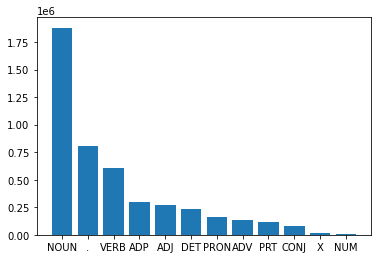

In [189]:
plot_tags(tags_description)

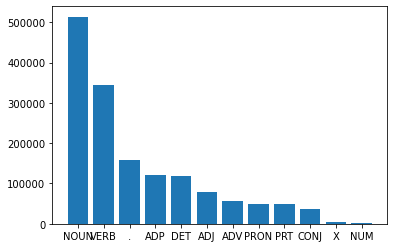

In [190]:
plot_tags(tags_resolution)

In [182]:
json.loads(incidents_2['Description_tags'][0].replace("'", '"'))

{'NOUN': 10,
 '.': 3,
 'DET': 1,
 'VERB': 4,
 'ADV': 1,
 'PRON': 1,
 'PRT': 1,
 'ADJ': 1}

<BarContainer object of 12 artists>

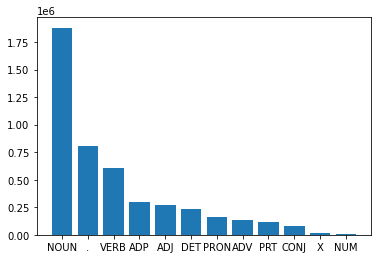

In [133]:
import matplotlib.pyplot as plt
all_tags = dict(sorted(all_tags.items(), key=lambda item: item[1], reverse=True))
plt.bar(list(all_tags.keys()), list(all_tags.values()))

In [200]:
list(all_tags.keys())

['NOUN',
 '.',
 'VERB',
 'ADP',
 'ADJ',
 'DET',
 'PRON',
 'ADV',
 'PRT',
 'CONJ',
 'X',
 'NUM']